In [1]:
# %%bash
# pip install -U scikit-learn

1) Importing packages and Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
train_data = pd.read_csv("../input/facial-keypoints-detection/training.zip")
train_data.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [5]:
train_data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [6]:
test_data  = pd.read_csv("../input/facial-keypoints-detection/test.zip")
test_data.head(2)

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...


In [7]:
lookup_table = pd.read_csv("../input/facial-keypoints-detection/IdLookupTable.csv")
lookup_table.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [8]:
submission = pd.read_csv("../input/facial-keypoints-detection/SampleSubmission.csv")
submission.head()

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [9]:
train_data.shape

(7049, 31)

In [10]:
test_data.shape

(1783, 2)

2) Checking missing values and dropping them.

In [11]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [13]:
train_data = train_data.dropna()

3) Handling Image column as it is row ordered list of pixels**

In [14]:
train_data['Image'].head()

0    238 236 237 238 240 240 239 241 241 243 240 23...
1    219 215 204 196 204 211 212 200 180 168 178 19...
2    144 142 159 180 188 188 184 180 167 132 84 59 ...
3    193 192 193 194 194 194 193 192 168 111 50 12 ...
4    147 148 160 196 215 214 216 217 219 220 206 18...
Name: Image, dtype: object

>> 3.a) Image column data for Fully connected layer**

In [15]:
train_data_a = train_data.copy()
train_data_a.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [16]:
test_data_a = test_data.copy()
test_data_a.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [17]:
train_data_a['Image'] = train_data_a['Image'].apply(lambda x: np.fromstring(x, sep=" "))
train_data_a['Image'].head(2)

0    [238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239...
1    [219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212...
Name: Image, dtype: object

In [18]:
test_data_a['Image'] = test_data_a['Image'].apply(lambda x: np.fromstring(x, sep=" "))
test_data_a['Image'].head(2)

0    [182.0, 183.0, 182.0, 182.0, 180.0, 180.0, 176...
1    [76.0, 87.0, 81.0, 72.0, 65.0, 59.0, 64.0, 76....
Name: Image, dtype: object

4) Normalizing pixel values for images

In [19]:
train_data_a['Image'] = train_data_a['Image']/255
train_data_a['Image'].head(2)

0    [0.9333333333333333, 0.9254901960784314, 0.929...
1    [0.8588235294117647, 0.8431372549019608, 0.8, ...
Name: Image, dtype: object

In [20]:
X = np.vstack(train_data_a['Image'].values)
X.shape

(2140, 9216)

In [21]:
test_data_a['Image'] = test_data_a['Image']/255
X_test = np.vstack(test_data_a['Image'].values)
X_test.shape

(1783, 9216)

In [22]:
y = train_data_a.iloc[:,:-1]
y.shape

(2140, 30)

In [23]:
y = (y-48)/48
y = y.values
y.shape

(2140, 30)

5) Looking few images with Keypoints

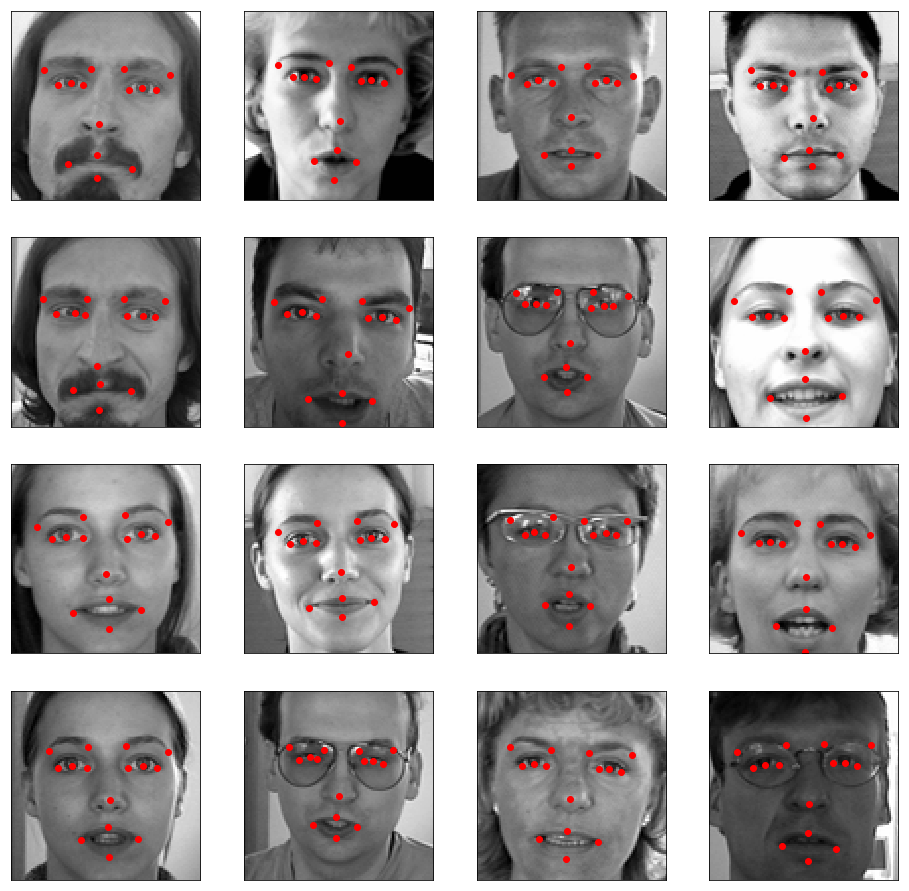

In [24]:
def get_image_and_dots(df, y, index):
    image = df[index].reshape(96,96)
    points = y.iloc[index]
    #plt.fig
    image = plt.imshow(image,cmap='gray')
    
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(points[i-1], points[i], 'ro'))
        
    return image, l



fig = plt.figure(figsize=(16, 16))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(train_data_a['Image'], train_data_a.iloc[:,:-1], i)

plt.show()

6) Creating Fully Connected Layer

In [25]:
X.shape

(2140, 9216)

In [26]:
y.shape

(2140, 30)

In [27]:
## Earlystopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 100)

## ModelCheckpoint to save best model
mc = ModelCheckpoint('best_model1.h5', monitor='val_loss', mode='min', verbose = 1, save_best_only=True)

##Initializing the model
model = Sequential()

## Adding first hidden layer and input layer
model.add(Dense(units = 500, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
model.add(Dropout(0.1))
## Adding the second hidden layer
model.add(Dense(units = 250, kernel_initializer = 'uniform', activation = 'relu'))

## Adding Output layer
model.add(Dense(units = 30, kernel_initializer = 'uniform'))

## Compiling with optimizer
model.compile(optimizer = 'adam', loss='mse')

hist = model.fit(X, y, nb_epoch=2000,batch_size=128,verbose=True, validation_split=0.1, callbacks = [es, mc])
hist

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1926 samples, validate on 214 samples
Epoch 1/2000
1926/1926 [==============================] - 1s 624us/step - loss: 0.1393 - val_loss: 0.0236

Epoch 00001: val_loss improved from inf to 0.02365, saving model to best_model1.h5
Epoch 2/2000
1926/1926 [==============================] - 0s 73us/step - loss: 0.0238 - val_loss: 0.0135

Epoch 00002: val_loss improved from 0.02365 to 0.01351, saving model to best_model1.h5
Epoch 3/2000
1926/1926 [==============================] - 0s 106us/step - loss: 0.0150 - val_loss: 0.0120

Epoch 00003: val_loss improved from 0.01351 to 0.01195, saving model to best_model1.h5
Epoch 4/2000
1926/1926 [==============================] - 0s 83us/step - loss: 0.0125 - val_loss: 0.0157

Epoch 00004: val_loss did not improve from 0.01195
Epoch 5/2000
1926/1926 [==============================] - 0s 83us/step - loss: 0.0121 - val_loss: 0.0114

Epoch 00005: val_loss improved from 0.01195 to 0.01144, saving model to best_model1.h5
Epoch 6/2000
1926/1926 [==

In [28]:
saved_model1 = load_model('best_model1.h5')


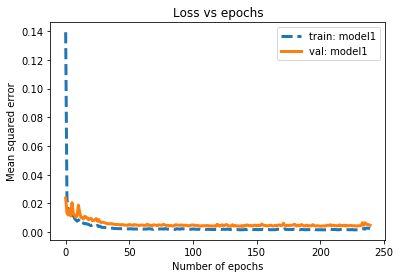

In [29]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(loss,"--",linewidth=3,label="train: model1")
plt.plot(val_loss,linewidth=3,label="val: model1")
plt.title("Loss vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Mean squared error")
plt.legend()

In [30]:
y_pred = saved_model1.predict(X_test)
y_pred = (y_pred * 48) + 48
y_pred = pd.DataFrame(y_pred, columns = train_data_a.iloc[:,:-1].columns)
y_pred.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.421944,37.491497,29.781519,37.189354,59.892776,38.138405,73.435982,38.367107,36.489922,37.871803,...,47.412300,54.773319,63.625305,73.103790,32.128132,73.189903,47.636784,68.957466,47.731430,81.198868
1,67.347878,36.409782,28.722775,37.166489,59.885303,37.661190,74.811943,37.098351,36.280361,37.874588,...,48.396370,58.767498,65.124954,76.593575,32.736397,77.636307,49.072380,75.064537,49.088024,83.920860
2,65.122681,36.754417,30.960175,38.208843,59.300236,37.704464,71.243057,37.270275,36.905029,38.756401,...,49.080723,57.723663,63.487274,74.851624,35.526394,75.623260,49.674641,71.989426,49.711452,81.757202
3,66.478127,38.201363,30.047989,39.083321,59.767204,39.209389,73.241928,39.059029,36.656822,39.668549,...,48.726048,54.889099,64.850983,75.773796,33.403271,76.587563,48.830898,70.456589,49.216961,83.481079
4,66.586121,36.447044,29.485743,37.160049,59.991901,37.710091,73.239761,37.388859,36.374458,37.790077,...,49.362812,57.088417,63.719612,75.483078,34.270584,76.151764,49.238777,72.476006,49.061661,82.736382


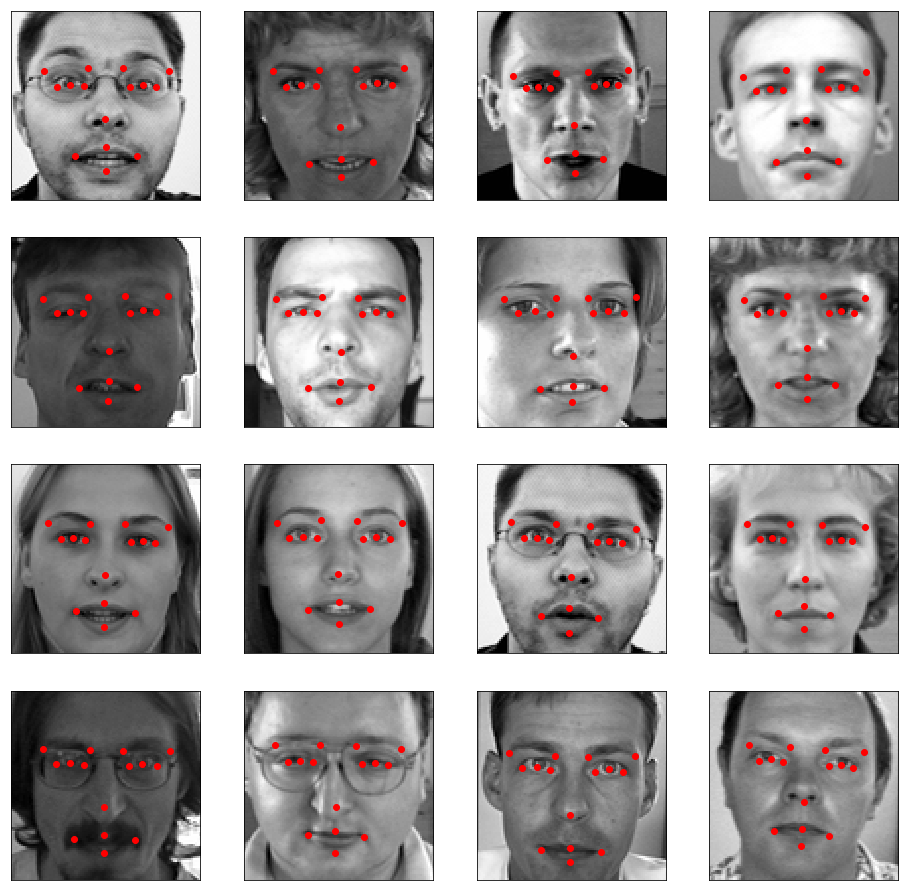

In [31]:
def get_image_and_dots(df, y, index):
    image = df[index].reshape(96,96)
    points = y.iloc[index]
    #plt.fig
    image = plt.imshow(image,cmap='gray')
    
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(points[i-1], points[i], 'ro'))
        
    return image, l



fig = plt.figure(figsize=(16, 16))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(test_data_a['Image'], y_pred, i)

plt.show()

In [32]:
def generate_csv(lookup_table, submission, y_pred, filename):
    for i in range(lookup_table.shape[0]):
        lookup_table.Location[i] = y_pred.loc[lookup_table.ImageId[i]-1][lookup_table.FeatureName[i]]
    submission['Location'] = lookup_table['Location']
    submission.to_csv(filename, index = False)

In [33]:
generate_csv(lookup_table, submission, y_pred, "best_model1.csv")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
y_pred.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.421944,37.491497,29.781519,37.189354,59.892776,38.138405,73.435982,38.367107,36.489922,37.871803,...,47.412300,54.773319,63.625305,73.103790,32.128132,73.189903,47.636784,68.957466,47.731430,81.198868
1,67.347878,36.409782,28.722775,37.166489,59.885303,37.661190,74.811943,37.098351,36.280361,37.874588,...,48.396370,58.767498,65.124954,76.593575,32.736397,77.636307,49.072380,75.064537,49.088024,83.920860
2,65.122681,36.754417,30.960175,38.208843,59.300236,37.704464,71.243057,37.270275,36.905029,38.756401,...,49.080723,57.723663,63.487274,74.851624,35.526394,75.623260,49.674641,71.989426,49.711452,81.757202
3,66.478127,38.201363,30.047989,39.083321,59.767204,39.209389,73.241928,39.059029,36.656822,39.668549,...,48.726048,54.889099,64.850983,75.773796,33.403271,76.587563,48.830898,70.456589,49.216961,83.481079
4,66.586121,36.447044,29.485743,37.160049,59.991901,37.710091,73.239761,37.388859,36.374458,37.790077,...,49.362812,57.088417,63.719612,75.483078,34.270584,76.151764,49.238777,72.476006,49.061661,82.736382


7) Applying CNN

In [35]:
train_data_b = train_data_a.copy()
train_data_b.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[0.9333333333333333, 0.9254901960784314, 0.929..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[0.8588235294117647, 0.8431372549019608, 0.8, ..."


In [36]:
test_data_b = test_data_a.copy()
test_data_b.head(2)

,ImageId,Image
0,1,"[0.7137254901960784, 0.7176470588235294, 0.713..."
1,2,"[0.2980392156862745, 0.3411764705882353, 0.317..."


In [37]:
X = np.vstack(train_data_a['Image'].values)
X.shape

(2140, 9216)

In [38]:
X = X.reshape(-1,96,96,1)
X.shape

(2140, 96, 96, 1)

In [39]:
X_test.shape
X_test = X_test.reshape(-1, 96,96,1)
X_test.shape

(1783, 96, 96, 1)

In [40]:
# ## Building CNN
# ## Earlystopping
# # es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 100)

# # ## ModelCheckpoint to save best model
# # mc = ModelCheckpoint('best_model1.h5', monitor='val_loss', mode='min', verbose = 1, save_best_only=True)

# ## 1st Convulational layer
# model_cnn = Sequential()
# model_cnn.add(Conv2D(32, 3, 3, input_shape=(96,96,1), activation='relu'))
# model_cnn.add(MaxPooling2D(2,2))

# ## 2nd Convulational layer
# model_cnn.add(Conv2D(64, 2, 2, activation = 'relu'))
# model_cnn.add(MaxPooling2D(2,2))

# ## 3rd Convulational layer
# model_cnn.add(Conv2D(128, 2, 2, activation='relu'))
# model_cnn.add(MaxPooling2D(2,2))

# ## Flattening
# model_cnn.add(Flatten())

# ## 1st Fully connected layer
# model_cnn.add(Dense(500, activation = 'relu'))

# ## 2nd Fully connected layer
# model_cnn.add(Dense(500, activation='relu'))

# ## Output layer
# model_cnn.add(Dense(30))

# ## Compiling with optimizer
# model_cnn.compile(optimizer = 'adam', loss='mse')

# hist_cnn = model_cnn.fit(X, y, nb_epoch=1000,batch_size=128,verbose=True, validation_split=0.1)
# hist_cnn

In [41]:
# loss = hist_cnn.history['loss']
# val_loss = hist_cnn.history['val_loss']

# plt.plot(loss,"--",linewidth=3,label="train: model_cnn")
# plt.plot(val_loss,linewidth=3,label="val: model_cnn")
# plt.title("Loss vs epochs")
# plt.xlabel("Number of epochs")
# plt.ylabel("Mean squared error")
# plt.legend()

In [42]:
# y_pred = model_cnn.predict(X_test)
# y_pred = (y_pred * 48) + 48
# y_pred = pd.DataFrame(y_pred, columns = train_data_a.iloc[:,:-1].columns)
# y_pred.head()

In [43]:
# def get_image_and_dots(df, y, index):
#     image = df[index].reshape(96,96)
#     points = y.iloc[index]
#     #plt.fig
#     image = plt.imshow(image,cmap='gray')
    
#     l = []
#     for i in range(1,31,2):
#         l.append(plt.plot(points[i-1], points[i], 'ro'))
        
#     return image, l



# fig = plt.figure(figsize=(16, 16))

# for i in range(16):
#     ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
#     get_image_and_dots(test_data_a['Image'], y_pred, i)

# plt.show()

In [44]:
# generate_csv(lookup_table, submission, y_pred, "model_cnn.csv")

In [45]:
## Building CNN with EarlyStopping and saving Best model
## Earlystopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 300)

## ModelCheckpoint to save best model
mc = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', verbose = 1, save_best_only=True)

## 1st Convulational layer
model_cnn = Sequential()
model_cnn.add(Conv2D(32, 3, 3, input_shape=(96,96,1), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))

## 2nd Convulational layer
model_cnn.add(Conv2D(64, 2, 2, activation = 'relu'))
model_cnn.add(MaxPooling2D(2,2))

## 3rd Convulational layer
model_cnn.add(Conv2D(128, 2, 2, activation='relu'))
model_cnn.add(MaxPooling2D(2,2))

## Flattening
model_cnn.add(Flatten())

## 1st Fully connected layer
model_cnn.add(Dense(500, activation = 'relu'))

## 2nd Fully connected layer
model_cnn.add(Dense(500, activation='relu'))

## Output layer
model_cnn.add(Dense(30))

## Compiling with optimizer
model_cnn.compile(optimizer = 'adam', loss='mse')

hist_cnn = model_cnn.fit(X, y, nb_epoch=2000,batch_size=128,verbose=True, validation_split=0.1, callbacks = [es, mc])
hist_cnn

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(96, 96, 1..., activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), activation="relu")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1926 samples, validate on 214 samples
Epoch 1/2000
1926/1926 [==============================] - 4s 2ms/step - loss: 0.0280 - val_loss: 0.0100

Epoch 00001: val_loss improved from inf to 0.01005, saving model to best_model2.h5
Epoch 2/2000
1926/1926 [==============================] - 0s 199us/step - loss: 0.0065 - val_loss: 0.0076

Epoch 00002: val_loss improved from 0.01005 to 0.00757, saving model to best_model2.h5
Epoch 3/2000
1926/1926 [==============================] - 0s 202us/step - loss: 0.0043 - val_loss: 0.0074

Epoch 00003: val_loss improved from 0.00757 to 0.00742, saving model to best_model2.h5
Epoch 4/2000
1926/1926 [==============================] - 0s 200us/step - loss: 0.0039 - val_loss: 0.0071

Epoch 00004: val_loss improved from 0.00742 to 0.00708, saving model to best_model2.h5
Epoch 5/2000
1926/1926 [==============================] - 0s 212us/step - loss: 0.0031 - val_loss: 0.0054

Epoch 00005: val_loss improved from 0.00708 to 0.00542, saving model to best

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,65.601219,38.189419,30.431030,36.486172,60.207558,38.611549,72.341293,39.199684,36.375347,36.917835,...,50.681580,50.349220,64.309708,76.537094,32.354706,76.554260,48.769131,68.948540,48.221676,87.275848
1,67.382248,36.359467,28.059593,38.007660,60.767948,37.408276,74.902939,36.598541,34.264420,38.218971,...,49.647243,59.044678,65.208984,74.357506,34.078560,76.252831,49.623322,71.368835,49.621193,86.629814
2,65.814598,37.182545,31.728548,38.501221,60.229721,37.265823,72.226387,36.930119,37.176468,38.532974,...,49.457577,56.365135,64.439819,74.715729,35.920860,75.540062,50.307884,71.972900,50.147476,84.532867
3,66.235413,38.840076,31.726229,39.924248,59.818066,39.945091,73.393036,40.208374,37.044350,40.894032,...,47.317574,52.990883,65.601562,78.654892,33.573685,79.228973,48.375320,71.915573,48.558365,83.056412
4,66.946259,38.396832,28.323814,39.186695,61.180279,38.632404,73.724686,39.022861,34.816818,38.775738,...,47.640060,53.559978,65.100273,77.464127,34.500427,76.685471,48.751923,70.233673,49.306030,86.102562


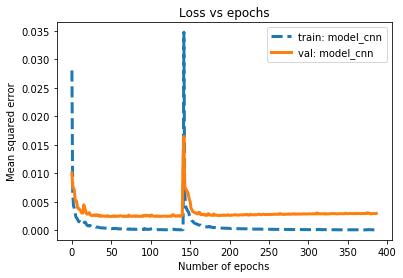

In [46]:
## Ploting Loss
loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']

plt.plot(loss,"--",linewidth=3,label="train: model_cnn")
plt.plot(val_loss,linewidth=3,label="val: model_cnn")
plt.title("Loss vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Mean squared error")
plt.legend()

saved_model2 = load_model('best_model2.h5')

y_pred = saved_model2.predict(X_test)
y_pred = (y_pred * 48) + 48
y_pred = pd.DataFrame(y_pred, columns = train_data_a.iloc[:,:-1].columns)
y_pred.head()

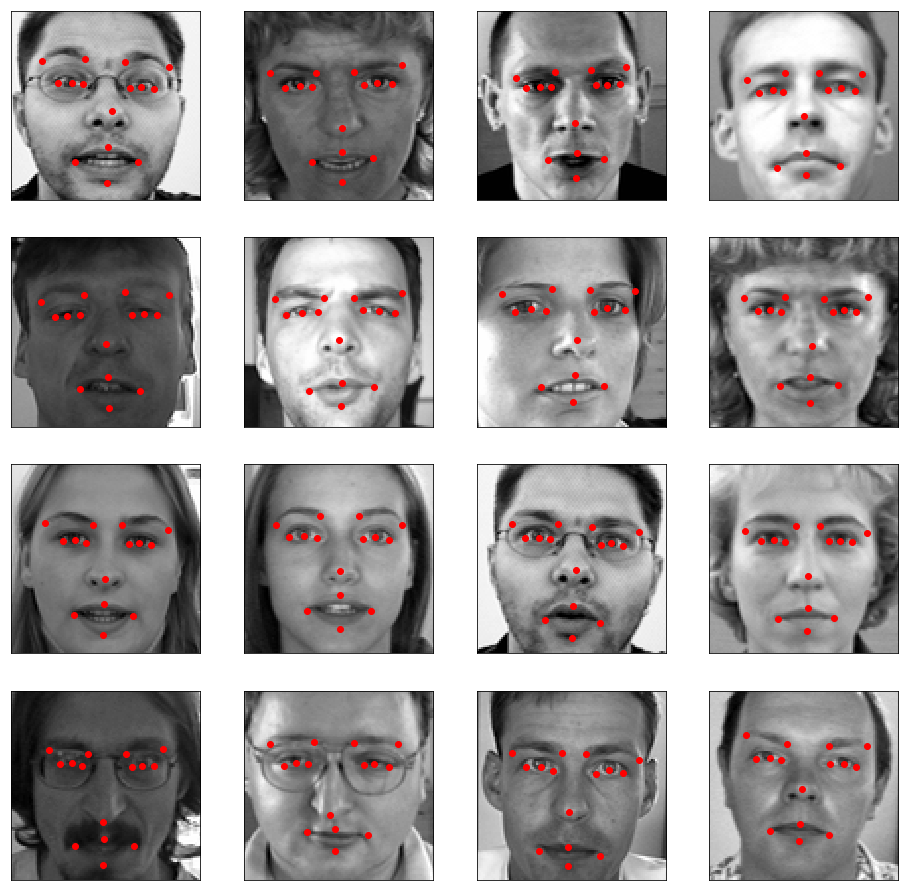

In [47]:
def get_image_and_dots(df, y, index):
    image = df[index].reshape(96,96)
    points = y.iloc[index]
    #plt.fig
    image = plt.imshow(image,cmap='gray')
    
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(points[i-1], points[i], 'ro'))
        
    return image, l



fig = plt.figure(figsize=(16, 16))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(test_data_a['Image'], y_pred, i)

plt.show()

In [48]:
generate_csv(lookup_table, submission, y_pred, "best_model2.csv")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


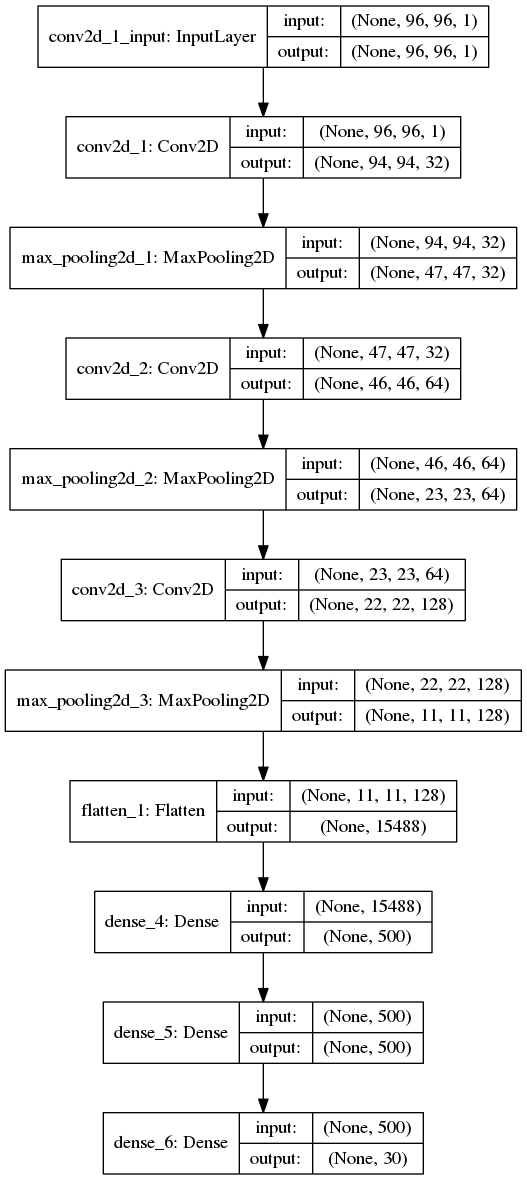

In [49]:
from keras.utils import vis_utils
vis_utils.plot_model(saved_model2, to_file='model2.png', show_shapes=True)

8) Data Augmentation

>>**Note**: ImageDataGenerator replace original image with augmented image and does not return both augmented image and original image.

>> Approach 1: Increasing the size of Dataset by adding augmenting images

>> Approach 2: Augmenting 50% of the images from batch on the fly

**Approach 1**

In [50]:
flip_indices = [
    (0, 2), (1, 3),
    (4, 8), (5, 9), (6, 10), (7, 11),
    (12, 16), (13, 17), (14, 18), (15, 19),
    (22, 24), (23, 25),
    ]

for i, j in flip_indices:
    print("{} -> {}".format(train_data.columns[i], train_data.columns[j]))

left_eye_center_x -> right_eye_center_x
left_eye_center_y -> right_eye_center_y
left_eye_inner_corner_x -> right_eye_inner_corner_x
left_eye_inner_corner_y -> right_eye_inner_corner_y
left_eye_outer_corner_x -> right_eye_outer_corner_x
left_eye_outer_corner_y -> right_eye_outer_corner_y
left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
mouth_left_corner_x -> mouth_right_corner_x
mouth_left_corner_y -> mouth_right_corner_y


Problem with above flipping method is just swapping the coordinates for above keypoints won't help if coordinates of nose is getting changed. Please see method used below to handle coordinates of keypoints.

In [51]:
keypoints = train_data_b.iloc[:,:-1]
keypoints.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170


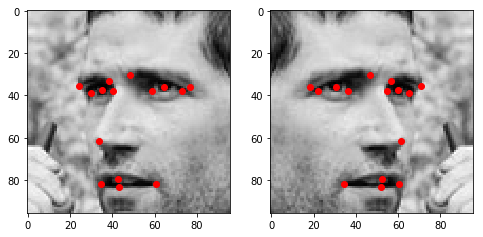

In [52]:
image = X[2010].reshape(96,96)
points = keypoints.iloc[2010]
#plt.fig
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,2,1)
ax.imshow(image,cmap='gray')
l = []
for i in range(1,31,2):
    l.append(plt.plot(points[i-1], points[i], 'ro'))

ax = fig.add_subplot(1,2,2)
ax.imshow(image[:,::-1],cmap='gray')
l = []
for i in range(1,31,2):
    l.append(plt.plot(96-points[i-1]-1, points[i], 'ro'))


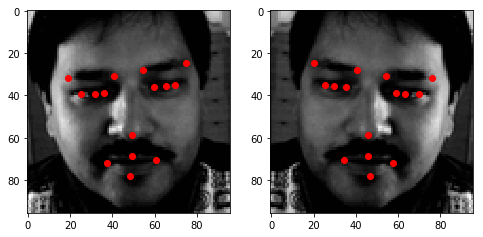

In [53]:
image = X[200].reshape(96,96)
points = keypoints.iloc[200]
# #plt.fig
points_mod = points.copy()
count = 0
for i in points.index:
    if i[-1] == 'x':
        points_mod.values[count] = 96-points_mod.values[count]-1
    count+=1

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,2,1)
ax.imshow(image,cmap='gray')
l = []
for i in range(1,31,2):
    l.append(plt.plot(points[i-1], points[i], 'ro'))

ax = fig.add_subplot(1,2,2)
ax.imshow(image[:,::-1],cmap='gray')
l = []
for i in range(1,31,2):
    l.append(plt.plot(points_mod[i-1], points_mod[i], 'ro'))



In [54]:
## Resetting indexes
train_data_b.reset_index(inplace=True)
train_data_b.drop('index',1,inplace=True)

In [55]:
## Generating horizontal flip data and applying train test split

new_train = train_data_b.copy()
columns = new_train.columns

X_train, X_val, y_train, y_val = train_test_split(new_train['Image'], new_train.iloc[:,:-1], random_state = 42, test_size = 0.2)

In [56]:
original_X_train = y_train.copy()
original_X_train['Image'] = X_train
original_X_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
966,65.859024,37.614009,31.401071,38.289638,60.116409,39.303080,72.615307,37.951824,36.806551,39.303080,...,62.274520,63.494551,77.814425,33.766299,78.152315,45.927307,72.747591,45.927307,88.624630,"[0.49019607843137253, 0.49019607843137253, 0.4..."
554,66.454252,39.431841,30.444079,36.860185,60.738119,39.717934,73.027391,40.575576,36.160212,37.431735,...,60.294993,59.881113,82.872795,35.017113,82.015788,47.305748,78.014305,47.591841,89.732026,"[0.2627450980392157, 0.28627450980392155, 0.31..."
2122,64.394739,36.276100,31.050884,38.969615,56.314195,37.158458,70.710567,36.485079,39.015329,39.039274,...,57.993651,63.169321,79.992218,35.311362,83.989497,50.092684,80.191877,52.079435,82.411084,"[0.03137254901960784, 0.03137254901960784, 0.0..."
192,64.820293,38.478049,30.288390,38.478049,58.890927,39.175805,71.796293,40.571317,35.171902,39.524683,...,53.128585,64.123317,76.846829,27.847024,74.405463,43.392000,68.902244,43.067317,86.867512,"[0.5137254901960784, 0.5137254901960784, 0.517..."
679,67.008738,39.899815,30.705969,38.249354,60.078277,40.560000,73.279015,41.549538,36.646154,39.239631,...,60.031015,59.418092,83.793231,35.656615,83.463138,48.197169,75.872492,47.867077,92.373415,"[0.5529411764705883, 0.43529411764705883, 0.40..."


In [57]:
## Resetting indexes for original_X_train
original_X_train.reset_index(inplace=True)
original_X_train.drop('index',1,inplace=True)
original_X_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,65.859024,37.614009,31.401071,38.289638,60.116409,39.303080,72.615307,37.951824,36.806551,39.303080,...,62.274520,63.494551,77.814425,33.766299,78.152315,45.927307,72.747591,45.927307,88.624630,"[0.49019607843137253, 0.49019607843137253, 0.4..."
1,66.454252,39.431841,30.444079,36.860185,60.738119,39.717934,73.027391,40.575576,36.160212,37.431735,...,60.294993,59.881113,82.872795,35.017113,82.015788,47.305748,78.014305,47.591841,89.732026,"[0.2627450980392157, 0.28627450980392155, 0.31..."
2,64.394739,36.276100,31.050884,38.969615,56.314195,37.158458,70.710567,36.485079,39.015329,39.039274,...,57.993651,63.169321,79.992218,35.311362,83.989497,50.092684,80.191877,52.079435,82.411084,"[0.03137254901960784, 0.03137254901960784, 0.0..."
3,64.820293,38.478049,30.288390,38.478049,58.890927,39.175805,71.796293,40.571317,35.171902,39.524683,...,53.128585,64.123317,76.846829,27.847024,74.405463,43.392000,68.902244,43.067317,86.867512,"[0.5137254901960784, 0.5137254901960784, 0.517..."
4,67.008738,39.899815,30.705969,38.249354,60.078277,40.560000,73.279015,41.549538,36.646154,39.239631,...,60.031015,59.418092,83.793231,35.656615,83.463138,48.197169,75.872492,47.867077,92.373415,"[0.5529411764705883, 0.43529411764705883, 0.40..."


In [58]:
updated_X_train = y_train.copy()
updated_X_train['Image'] = X_train
updated_X_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
966,65.859024,37.614009,31.401071,38.289638,60.116409,39.303080,72.615307,37.951824,36.806551,39.303080,...,62.274520,63.494551,77.814425,33.766299,78.152315,45.927307,72.747591,45.927307,88.624630,"[0.49019607843137253, 0.49019607843137253, 0.4..."
554,66.454252,39.431841,30.444079,36.860185,60.738119,39.717934,73.027391,40.575576,36.160212,37.431735,...,60.294993,59.881113,82.872795,35.017113,82.015788,47.305748,78.014305,47.591841,89.732026,"[0.2627450980392157, 0.28627450980392155, 0.31..."
2122,64.394739,36.276100,31.050884,38.969615,56.314195,37.158458,70.710567,36.485079,39.015329,39.039274,...,57.993651,63.169321,79.992218,35.311362,83.989497,50.092684,80.191877,52.079435,82.411084,"[0.03137254901960784, 0.03137254901960784, 0.0..."
192,64.820293,38.478049,30.288390,38.478049,58.890927,39.175805,71.796293,40.571317,35.171902,39.524683,...,53.128585,64.123317,76.846829,27.847024,74.405463,43.392000,68.902244,43.067317,86.867512,"[0.5137254901960784, 0.5137254901960784, 0.517..."
679,67.008738,39.899815,30.705969,38.249354,60.078277,40.560000,73.279015,41.549538,36.646154,39.239631,...,60.031015,59.418092,83.793231,35.656615,83.463138,48.197169,75.872492,47.867077,92.373415,"[0.5529411764705883, 0.43529411764705883, 0.40..."


In [59]:
## Resetting indexes for updated_X_train
updated_X_train.reset_index(inplace=True)
updated_X_train.drop('index',1,inplace=True)
updated_X_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,65.859024,37.614009,31.401071,38.289638,60.116409,39.303080,72.615307,37.951824,36.806551,39.303080,...,62.274520,63.494551,77.814425,33.766299,78.152315,45.927307,72.747591,45.927307,88.624630,"[0.49019607843137253, 0.49019607843137253, 0.4..."
1,66.454252,39.431841,30.444079,36.860185,60.738119,39.717934,73.027391,40.575576,36.160212,37.431735,...,60.294993,59.881113,82.872795,35.017113,82.015788,47.305748,78.014305,47.591841,89.732026,"[0.2627450980392157, 0.28627450980392155, 0.31..."
2,64.394739,36.276100,31.050884,38.969615,56.314195,37.158458,70.710567,36.485079,39.015329,39.039274,...,57.993651,63.169321,79.992218,35.311362,83.989497,50.092684,80.191877,52.079435,82.411084,"[0.03137254901960784, 0.03137254901960784, 0.0..."
3,64.820293,38.478049,30.288390,38.478049,58.890927,39.175805,71.796293,40.571317,35.171902,39.524683,...,53.128585,64.123317,76.846829,27.847024,74.405463,43.392000,68.902244,43.067317,86.867512,"[0.5137254901960784, 0.5137254901960784, 0.517..."
4,67.008738,39.899815,30.705969,38.249354,60.078277,40.560000,73.279015,41.549538,36.646154,39.239631,...,60.031015,59.418092,83.793231,35.656615,83.463138,48.197169,75.872492,47.867077,92.373415,"[0.5529411764705883, 0.43529411764705883, 0.40..."


In [60]:
## Getting x coordinate of keypoints which needs to be updated for flipped images
for i in columns:
    update_cols = [i for i in columns if i[-1] == 'x']

for i in range(updated_X_train.shape[0]):
    ## Flipping Images
    image = updated_X_train['Image'][i]
    image = updated_X_train['Image'][i].reshape(96,96)
    flipped_image = image[:,::-1]
    flipped_image = flipped_image.reshape(9216,)
    updated_X_train['Image'][i] = flipped_image
    
    ## Changing coordinates of keypoints
updated_X_train[update_cols] = 96-updated_X_train[update_cols]-1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


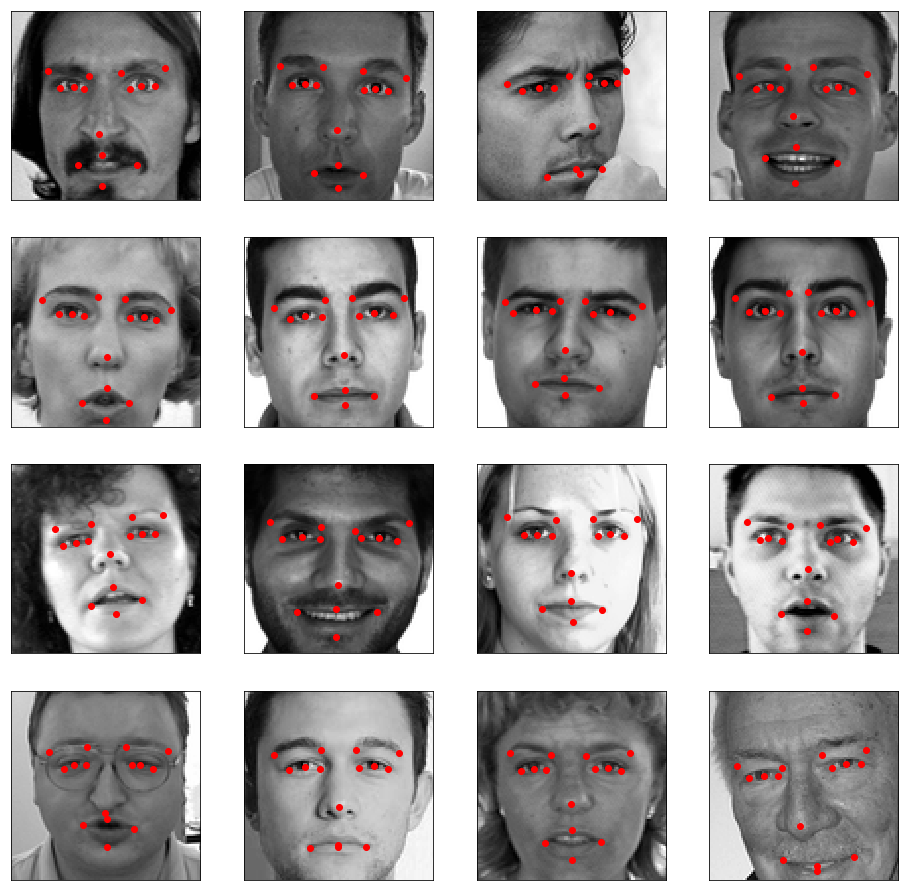

In [61]:
## Checking images before
def get_image_and_dots(df, y, index):
    image = df[index].reshape(96,96)
    points = y.iloc[index]
    #plt.fig
    image = plt.imshow(image,cmap='gray')
    
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(points[i-1], points[i], 'ro'))
        
    return image, l



fig = plt.figure(figsize=(16, 16))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(original_X_train['Image'], original_X_train.iloc[:,:-1], i)

plt.show()

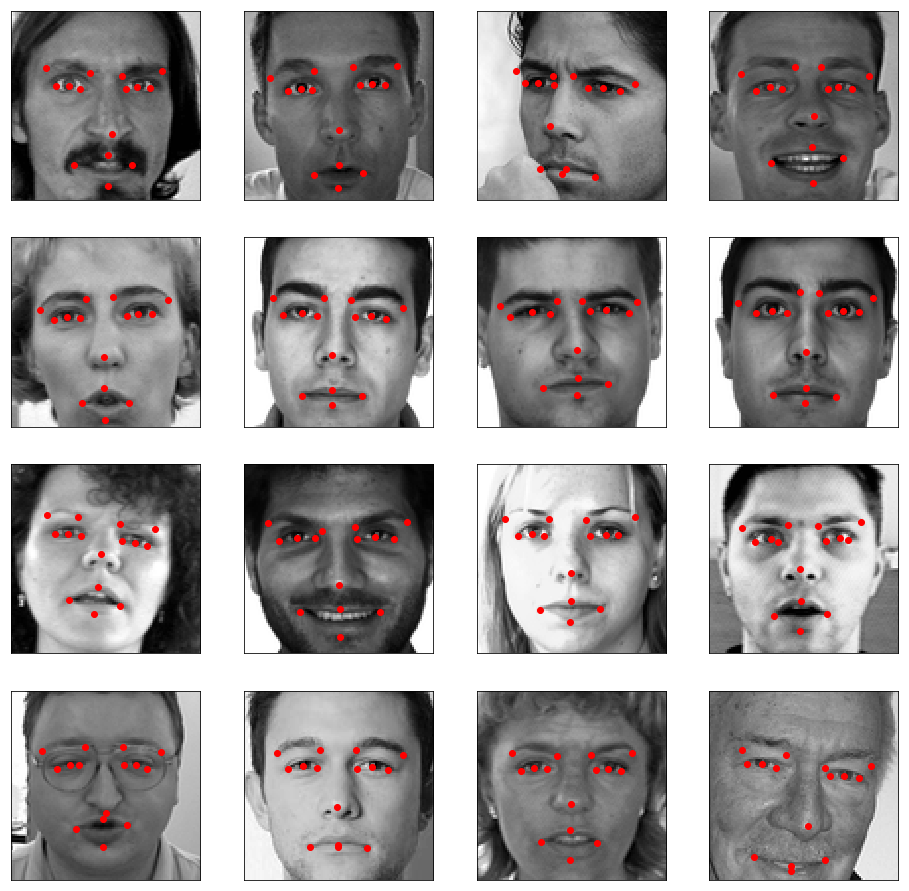

In [62]:
## Checking flipped images
def get_image_and_dots(df, y, index):
    image = df[index].reshape(96,96)
    points = y.iloc[index]
    #plt.fig
    image = plt.imshow(image,cmap='gray')
    
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(points[i-1], points[i], 'ro'))
        
    return image, l



fig = plt.figure(figsize=(16, 16))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(updated_X_train['Image'], updated_X_train.iloc[:,:-1], i)

plt.show()

In [63]:
original_X_train.shape

(1712, 31)

In [64]:
updated_X_train.shape

(1712, 31)

In [65]:
## Merge new generated augmented data with original data and then shuffle the data.
X_train = pd.concat([original_X_train,updated_X_train],0,ignore_index=True)
X_train.shape

(3424, 31)

In [66]:
X = np.vstack(X_train['Image'].values)
X.shape

(3424, 9216)

In [67]:
y = X_train.iloc[:,:-1]
y = y.values
y = (y-48)/48

In [68]:
y.shape

(3424, 30)

In [69]:
validation_set = y_val.copy()
validation_set['Image'] = X_val
validation_set.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
1532,66.317333,37.556333,28.700000,37.757667,58.270667,37.958667,75.168333,37.757667,37.953333,38.361000,...,58.678333,68.127667,72.558667,29.504667,72.759667,49.218333,69.138667,49.620667,87.645667,"[0.796078431372549, 0.7058823529411765, 0.5960..."
1726,68.785161,37.620059,31.359226,31.376530,60.412273,39.111989,75.888300,38.984299,39.854186,36.481575,...,59.956154,64.078609,66.873495,25.712151,62.880419,45.039460,73.151268,43.866237,76.444526,"[0.12941176470588237, 0.2196078431372549, 0.34..."
1414,65.197565,35.165565,29.376000,35.165565,58.540522,37.067826,72.805565,36.750609,35.716174,36.433739,...,55.771130,61.393391,75.108522,32.228870,75.425391,46.494261,68.134261,47.445217,80.180522,"[0.34509803921568627, 0.12156862745098039, 0.1..."
2064,62.211987,35.892589,38.985349,38.989474,57.093018,37.513899,67.494909,35.856155,42.719828,39.171643,...,59.608421,66.215882,70.240000,46.115002,72.135253,53.913584,71.606273,54.579706,73.809839,"[0.7215686274509804, 0.5098039215686274, 0.356..."
930,65.657032,39.754065,29.674065,37.678452,60.467613,40.100129,71.539355,41.138323,34.864258,38.716645,...,59.475871,56.661677,83.003613,33.826065,82.657548,46.628129,76.083871,45.936000,91.653677,"[0.5137254901960784, 0.4627450980392157, 0.372..."


In [70]:
X_val = np.vstack(validation_set['Image'].values)
X_val[:10]

array([[0.79607843, 0.70588235, 0.59607843, ..., 0.11372549, 0.14901961,
        0.17254902],
       [0.12941176, 0.21960784, 0.34509804, ..., 0.21176471, 0.22352941,
        0.23137255],
       [0.34509804, 0.12156863, 0.10196078, ..., 0.10980392, 0.11764706,
        0.12156863],
       ...,
       [0.61176471, 0.59607843, 0.59607843, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.17254902, 0.17254902, 0.17647059, ..., 0.58823529, 0.58823529,
        0.58039216],
       [1.        , 0.85882353, 0.48235294, ..., 0.09803922, 0.08627451,
        0.08235294]])

In [71]:
X_val.shape

(428, 9216)

In [72]:
y_val = validation_set.iloc[:,:-1]
y_val = y_val.values
y_val = (y_val-48)/48

In [73]:
## Shuffle
X,y = shuffle(X,y, random_state = 42)

In [74]:
X = X.reshape(-1,96,96,1)
X.shape

(3424, 96, 96, 1)

In [75]:
X_val = X_val.reshape(-1,96,96,1)
X_val.shape

(428, 96, 96, 1)

In [76]:
y.shape

(3424, 30)

In [77]:
y_val.shape

(428, 30)

In [78]:
X_test.shape

(1783, 96, 96, 1)

In [79]:
## Applying CNN model with early stopping and Model Checkpoint
## Building CNN with EarlyStopping and saving Best model
# Earlystopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 400)

## ModelCheckpoint to save best model
mc = ModelCheckpoint('best_model3.h5', monitor='val_loss', mode='min', verbose = 1, save_best_only=True)

## 1st Convulational layer
model_cnn = Sequential()
model_cnn.add(Conv2D(32, 3, 3, input_shape=(96,96,1), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))

## 2nd Convulational layer
model_cnn.add(Conv2D(64, 2, 2, activation = 'relu'))
model_cnn.add(MaxPooling2D(2,2))

## 3rd Convulational layer
model_cnn.add(Conv2D(128, 2, 2, activation='relu'))
model_cnn.add(MaxPooling2D(2,2))

## Flattening
model_cnn.add(Flatten())

## 1st Fully connected layer
model_cnn.add(Dense(500, activation = 'relu'))

## 2nd Fully connected layer
model_cnn.add(Dense(500, activation='relu'))

## Output layer
model_cnn.add(Dense(30))

## Compiling with optimizer
model_cnn.compile(optimizer = 'adam', loss='mse')

hist_cnn = model_cnn.fit(X, y, nb_epoch=2000,batch_size=128,verbose=True, validation_data = (X_val,y_val), callbacks = [es, mc])
hist_cnn

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(96, 96, 1..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu")`
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), activation="relu")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 3424 samples, validate on 428 samples
Epoch 1/2000
3424/3424 [==============================] - 1s 300us/step - loss: 0.0871 - val_loss: 0.0947

Epoch 00001: val_loss improved from inf to 0.09472, saving model to best_model3.h5
Epoch 2/2000
3424/3424 [==============================] - 1s 196us/step - loss: 0.0715 - val_loss: 0.0634

Epoch 00002: val_loss improved from 0.09472 to 0.06336, saving model to best_model3.h5
Epoch 3/2000
3424/3424 [==============================] - 1s 194us/step - loss: 0.0601 - val_loss: 0.0398

Epoch 00003: val_loss improved from 0.06336 to 0.03983, saving model to best_model3.h5
Epoch 4/2000
3424/3424 [==============================] - 1s 197us/step - loss: 0.0430 - val_loss: 0.0312

Epoch 00004: val_loss improved from 0.03983 to 0.03119, saving model to best_model3.h5
Epoch 5/2000
3424/3424 [==============================] - 1s 199us/step - loss: 0.0325 - val_loss: 0.0381

Epoch 00005: val_loss did not improve from 0.03119
Epoch 6/2000
3424/3424 

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,61.434036,38.225758,34.918343,36.962677,56.239269,37.960281,64.880051,36.995560,39.272648,37.925339,...,49.231590,50.839413,56.763153,73.602867,37.249722,75.683624,48.532017,67.738731,48.622715,84.989105
1,65.649818,37.255234,30.984566,36.958862,59.970634,38.537998,71.650314,38.630798,36.350689,38.646347,...,49.207516,58.747833,62.544319,75.582123,34.951626,76.158630,49.079903,71.137276,50.517624,84.880890
2,69.441292,36.195400,28.866276,37.517632,62.162994,36.347832,76.185959,35.979671,35.051697,37.296814,...,48.489876,57.244003,65.781281,75.526443,30.982204,76.921814,49.308186,70.751877,50.973038,84.127457
3,65.340080,37.278870,30.717793,39.558853,59.567970,38.521492,70.693893,38.366119,37.519299,38.943718,...,49.413151,54.766655,63.062344,73.682098,35.112164,73.727051,49.574646,66.844681,48.562958,78.669083
4,67.582977,36.515476,28.917046,39.227325,59.874554,38.071793,72.477211,38.959370,37.420700,37.710098,...,48.053772,54.842720,61.686424,76.022911,32.514687,77.152618,49.136608,69.664215,50.638824,87.174149


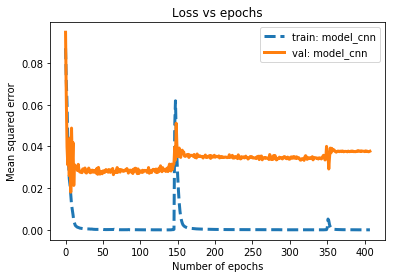

In [80]:
## Ploting Loss
loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']

plt.plot(loss,"--",linewidth=3,label="train: model_cnn")
plt.plot(val_loss,linewidth=3,label="val: model_cnn")
plt.title("Loss vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Mean squared error")
plt.legend()

saved_model3 = load_model('best_model3.h5')

y_pred = saved_model3.predict(X_test)
y_pred = (y_pred * 48) + 48
y_pred = pd.DataFrame(y_pred, columns = train_data_a.iloc[:,:-1].columns)
y_pred.head()

In [81]:
generate_csv(lookup_table, submission, y_pred, "best_model3.csv")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
## Applying CNN model with early stopping and Model Checkpoint and Dropout
## Building CNN with EarlyStopping and saving Best model
# Earlystopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 400)

## ModelCheckpoint to save best model
mc = ModelCheckpoint('best_model4.h5', monitor='val_loss', mode='min', verbose = 1, save_best_only=True)

## 1st Convulational layer
model_cnn = Sequential()
model_cnn.add(Conv2D(32, 3, 3, input_shape=(96,96,1), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.1))

## 2nd Convulational layer
model_cnn.add(Conv2D(64, 2, 2, activation = 'relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.2))

## 3rd Convulational layer
model_cnn.add(Conv2D(128, 2, 2, activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.3))

## Flattening
model_cnn.add(Flatten())

## 1st Fully connected layer
model_cnn.add(Dense(1000, activation = 'relu'))
model_cnn.add(Dropout(0.5))

## 2nd Fully connected layer
model_cnn.add(Dense(1000, activation='relu'))


## Output layer
model_cnn.add(Dense(30))

## Compiling with optimizer
model_cnn.compile(optimizer = 'adam', loss='mse')

hist_cnn = model_cnn.fit(X, y, nb_epoch=2000,batch_size=128,verbose=True, validation_data = (X_val,y_val), callbacks = [es, mc])
hist_cnn

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(96, 96, 1..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu")`
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), activation="relu")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 3424 samples, validate on 428 samples
Epoch 1/2000
3424/3424 [==============================] - 1s 379us/step - loss: 0.1210 - val_loss: 0.1141

Epoch 00001: val_loss improved from inf to 0.11406, saving model to best_model4.h5
Epoch 2/2000
3424/3424 [==============================] - 1s 257us/step - loss: 0.0781 - val_loss: 0.0902

Epoch 00002: val_loss improved from 0.11406 to 0.09016, saving model to best_model4.h5
Epoch 3/2000
3424/3424 [==============================] - 1s 240us/step - loss: 0.0748 - val_loss: 0.0858

Epoch 00003: val_loss improved from 0.09016 to 0.08584, saving model to best_model4.h5
Epoch 4/2000
3424/3424 [==============================] - 1s 255us/step - loss: 0.0710 - val_loss: 0.0850

Epoch 00004: val_loss improved from 0.08584 to 0.08499, saving model to best_model4.h5
Epoch 5/2000
3424/3424 [==============================] - 1s 240us/step - loss: 0.0682 - val_loss: 0.0727

Epoch 00005: val_loss improved from 0.08499 to 0.07271, saving model to be

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


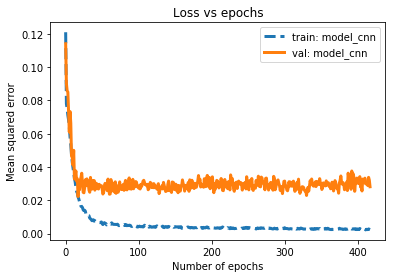

In [83]:
## Ploting Loss
loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']

plt.plot(loss,"--",linewidth=3,label="train: model_cnn")
plt.plot(val_loss,linewidth=3,label="val: model_cnn")
plt.title("Loss vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Mean squared error")
plt.legend()

saved_model4 = load_model('best_model4.h5')

y_pred = saved_model4.predict(X_test)
y_pred = (y_pred * 48) + 48
y_pred = pd.DataFrame(y_pred, columns = train_data_a.iloc[:,:-1].columns)
y_pred.head()

generate_csv(lookup_table, submission, y_pred, "best_model4.csv")

In [84]:
## Generating horizontal flip data and applying train test split

new_train = train_data_b.copy()
columns = new_train.columns
X = np.vstack(train_data_a['Image'].values)
X = X.reshape(-1,96,96,1)
y = train_data_b.iloc[:,:-1].values
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [85]:
X_train.shape

(1712, 96, 96, 1)

In [86]:
y_train = (y_train - 48)/48
y_train

array([[ 0.37206299, -0.2163748 , -0.34581102, ...,  0.5155748 ,
        -0.0431811 ,  0.84634646],
       [ 0.38446358, -0.17850331, -0.36574834, ...,  0.62529801,
        -0.00850331,  0.86941722],
       [ 0.34155707, -0.24424792, -0.35310658, ...,  0.6706641 ,
         0.08498822,  0.71689759],
       ...,
       [ 0.40102913, -0.25295146, -0.37998058, ...,  0.38052427,
        -0.01551456,  0.7536699 ],
       [ 0.45343796, -0.1929708 , -0.40183942, ...,  0.72154745,
        -0.00937226,  0.89186131],
       [ 0.45054717, -0.32877925, -0.40111321, ...,  0.40483019,
         0.06266038,  0.71681132]])

In [87]:
X_val.shape

(428, 96, 96, 1)

In [88]:
y_val = (y_val - 48)/48
y_val

array([[ 0.38161111, -0.21757639, -0.40208333, ...,  0.44038889,
         0.03376389,  0.82595139],
       [ 0.43302419, -0.21624876, -0.34668279, ...,  0.52398476,
        -0.08612007,  0.5925943 ],
       [ 0.35828261, -0.26738406, -0.388     , ...,  0.41946377,
        -0.01155797,  0.67042754],
       ...,
       [ 0.35886869, -0.23502222, -0.37244444, ...,  0.38793939,
         0.03383838,  0.70393939],
       [ 0.47689209, -0.20132086, -0.44264748, ...,  0.39670504,
        -0.01181295,  0.76322302],
       [ 0.37159441, -0.20861538, -0.37846154, ...,  0.49144056,
        -0.00344056,  0.69145455]])

In [89]:
class FlippedImageDataGenerator(ImageDataGenerator):
    def next(self):
        X_batch, y_batch = super(FlippedImageDataGenerator, self).next()
        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, batch_size/2, replace=False)
        X_batch[indices] = X_batch[indices, :, :, ::-1]
        update_cols = ['left_eye_center_x', 'right_eye_center_x', 'left_eye_inner_corner_x',
                       'left_eye_outer_corner_x', 'right_eye_inner_corner_x', 'right_eye_outer_corner_x',
                       'left_eyebrow_inner_end_x', 'left_eyebrow_outer_end_x', 'right_eyebrow_inner_end_x',
                       'right_eyebrow_outer_end_x', 'nose_tip_x', 'mouth_left_corner_x',
                       'mouth_right_corner_x', 'mouth_center_top_lip_x','mouth_center_bottom_lip_x']
        y_batch = (y_batch * 48) + 48
        y_batch = pd.DataFrame(y_batch, columns = train_data_b.iloc[:,:-1])
        for i in indices:
            y_batch.loc[i, update_cols] = 96 - (y_batch.loc[i, update_cols]) - 1
        y_batch = y_batch.values
        y_batch = (y_batch - 48)/48
        return X_batch, y_batch

In [90]:
## Applying CNN model with early stopping and Model Checkpoint
## Building CNN with EarlyStopping and saving Best model
# Earlystopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 400)

## ModelCheckpoint to save best model
mc = ModelCheckpoint('best_model5.h5', monitor='val_loss', mode='min', verbose = 1, save_best_only=True)

## 1st Convulational layer
model_cnn = Sequential()
model_cnn.add(Conv2D(32, 3, 3, input_shape=(96,96,1), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))

## 2nd Convulational layer
model_cnn.add(Conv2D(64, 2, 2, activation = 'relu'))
model_cnn.add(MaxPooling2D(2,2))

## 3rd Convulational layer
model_cnn.add(Conv2D(128, 2, 2, activation='relu'))
model_cnn.add(MaxPooling2D(2,2))

## Flattening
model_cnn.add(Flatten())

## 1st Fully connected layer
model_cnn.add(Dense(500, activation = 'relu'))

## 2nd Fully connected layer
model_cnn.add(Dense(500, activation='relu'))

## Output layer
model_cnn.add(Dense(30))

## Compiling with optimizer
model_cnn.compile(optimizer = 'adam', loss='mse')

flipgen = FlippedImageDataGenerator()
hist_cnn = model_cnn.fit_generator(flipgen.flow(X_train, y_train),
                             samples_per_epoch=X_train.shape[0],
                             nb_epoch=3000,
                             validation_data=(X_val, y_val), callbacks = [es, mc])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(96, 96, 1..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu")`
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), activation="relu")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_ste

Epoch 1/3000
53/53 [==============================] - 1s 21ms/step - loss: 0.0148 - val_loss: 0.0042

Epoch 00001: val_loss improved from inf to 0.00419, saving model to best_model5.h5
Epoch 2/3000
53/53 [==============================] - 1s 12ms/step - loss: 0.0037 - val_loss: 0.0031

Epoch 00002: val_loss improved from 0.00419 to 0.00308, saving model to best_model5.h5
Epoch 3/3000
53/53 [==============================] - 1s 12ms/step - loss: 0.0024 - val_loss: 0.0020

Epoch 00003: val_loss improved from 0.00308 to 0.00202, saving model to best_model5.h5
Epoch 4/3000
53/53 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 0.0019

Epoch 00004: val_loss improved from 0.00202 to 0.00187, saving model to best_model5.h5
Epoch 5/3000
53/53 [==============================] - 1s 13ms/step - loss: 0.0016 - val_loss: 0.0015

Epoch 00005: val_loss improved from 0.00187 to 0.00154, saving model to best_model5.h5
Epoch 6/3000
53/53 [==============================] - 1s 14

In [91]:
X_test  = X_test.reshape(-1,96,96,1)

In [92]:
X_test.shape

(1783, 96, 96, 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


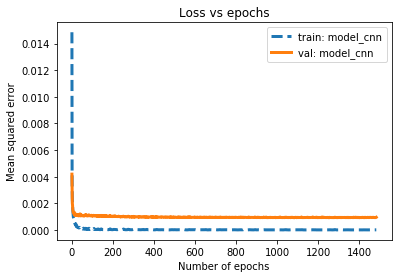

In [93]:
## Ploting Loss
loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']

plt.plot(loss,"--",linewidth=3,label="train: model_cnn")
plt.plot(val_loss,linewidth=3,label="val: model_cnn")
plt.title("Loss vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Mean squared error")
plt.legend()

saved_model5 = load_model('best_model5.h5')

y_pred = saved_model5.predict(X_test)
y_pred = (y_pred * 48) + 48
y_pred = pd.DataFrame(y_pred, columns = train_data_a.iloc[:,:-1].columns)

generate_csv(lookup_table, submission, y_pred, "best_model5.csv")

In [94]:
## Applying CNN model with early stopping and Model Checkpoint
## Building CNN with EarlyStopping and saving Best model
# Earlystopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 400)

## ModelCheckpoint to save best model
mc = ModelCheckpoint('best_model6.h5', monitor='val_loss', mode='min', verbose = 1, save_best_only=True)

## 1st Convulational layer
model_cnn = Sequential()
model_cnn.add(Conv2D(32, 3, 3, input_shape=(96,96,1), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.1))

## 2nd Convulational layer
model_cnn.add(Conv2D(64, 2, 2, activation = 'relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.2))


## 3rd Convulational layer
model_cnn.add(Conv2D(128, 2, 2, activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.3))


## Flattening
model_cnn.add(Flatten())

## 1st Fully connected layer
model_cnn.add(Dense(1000, activation = 'relu'))
model_cnn.add(Dropout(0.5))


## 2nd Fully connected layer
model_cnn.add(Dense(1000, activation='relu'))

## Output layer
model_cnn.add(Dense(30))

## Compiling with optimizer
model_cnn.compile(optimizer = 'adam', loss='mse')

flipgen = FlippedImageDataGenerator()
hist_cnn = model_cnn.fit_generator(flipgen.flow(X_train, y_train),
                             samples_per_epoch=X_train.shape[0],
                             nb_epoch=3000,
                             validation_data=(X_val, y_val), callbacks = [es, mc])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(96, 96, 1..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu")`
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), activation="relu")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_

Epoch 1/3000
53/53 [==============================] - 1s 24ms/step - loss: 0.0254 - val_loss: 0.0374

Epoch 00001: val_loss improved from inf to 0.03741, saving model to best_model6.h5
Epoch 2/3000
53/53 [==============================] - 1s 16ms/step - loss: 0.0061 - val_loss: 0.0293

Epoch 00002: val_loss improved from 0.03741 to 0.02929, saving model to best_model6.h5
Epoch 3/3000
53/53 [==============================] - 1s 17ms/step - loss: 0.0055 - val_loss: 0.0227

Epoch 00003: val_loss improved from 0.02929 to 0.02271, saving model to best_model6.h5
Epoch 4/3000
53/53 [==============================] - 1s 16ms/step - loss: 0.0051 - val_loss: 0.0161

Epoch 00004: val_loss improved from 0.02271 to 0.01606, saving model to best_model6.h5
Epoch 5/3000
53/53 [==============================] - 1s 16ms/step - loss: 0.0046 - val_loss: 0.0090

Epoch 00005: val_loss improved from 0.01606 to 0.00901, saving model to best_model6.h5
Epoch 6/3000
53/53 [==============================] - 1s 16

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


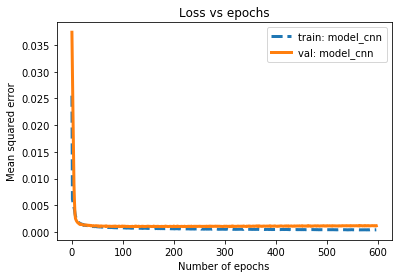

In [95]:
## Ploting Loss
loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']

plt.plot(loss,"--",linewidth=3,label="train: model_cnn")
plt.plot(val_loss,linewidth=3,label="val: model_cnn")
plt.title("Loss vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Mean squared error")
plt.legend()

saved_model6 = load_model('best_model6.h5')

y_pred = saved_model6.predict(X_test)
y_pred = (y_pred * 48) + 48
y_pred = pd.DataFrame(y_pred, columns = train_data_a.iloc[:,:-1].columns)

generate_csv(lookup_table, submission, y_pred, "best_model6.csv")